In [2]:
#libraries
import tensorflow as tf
import numpy as np
import random
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from PIL import Image


## load the data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [4]:

x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
print("Shape of X_train: ", x_train.shape)
print("Shape of Y_train: ", y_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of Y_test: ", y_test.shape)

Shape of X_train:  (50000, 32, 32, 3)
Shape of Y_train:  (50000, 1)
Shape of X_test:  (10000, 32, 32, 3)
Shape of Y_test:  (10000, 1)


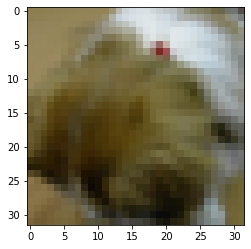

In [6]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

## build the model

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## train the model

In [10]:
# Train the model
model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))


Epoch 1/15
1563/1563 [==============================] - 47s 29ms/step - loss: 1.4689 - accuracy: 0.4683 - val_loss: 1.2020 - val_accuracy: 0.5779
Epoch 2/15
1563/1563 [==============================] - 49s 31ms/step - loss: 1.0884 - accuracy: 0.6163 - val_loss: 1.0402 - val_accuracy: 0.6372
Epoch 3/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9238 - accuracy: 0.6777 - val_loss: 0.9334 - val_accuracy: 0.6721
Epoch 4/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8143 - accuracy: 0.7158 - val_loss: 0.8888 - val_accuracy: 0.6938
Epoch 5/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7361 - accuracy: 0.7425 - val_loss: 0.8793 - val_accuracy: 0.6949
Epoch 6/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6576 - accuracy: 0.7679 - val_loss: 0.8513 - val_accuracy: 0.7079
Epoch 7/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.5881 - accuracy: 0.7953 - val_loss: 0.8738 -

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.3730 - accuracy: 0.7006


[1.3730442523956299, 0.7006000280380249]

## Testing

313/313 [==============================] - 3s 9ms/step
Predicted label: cat, Actual label: cat


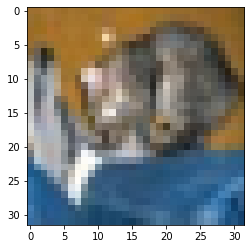

Predicted label: ship, Actual label: ship


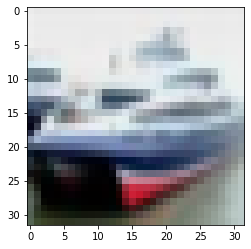

Predicted label: ship, Actual label: ship


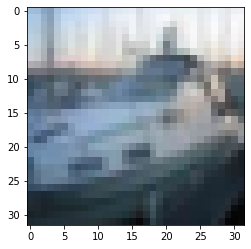

Predicted label: airplane, Actual label: airplane


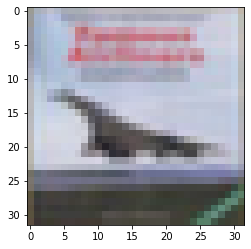

Predicted label: frog, Actual label: frog


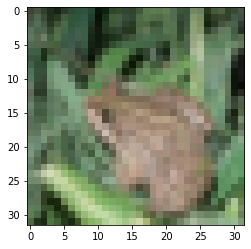

Predicted label: frog, Actual label: frog


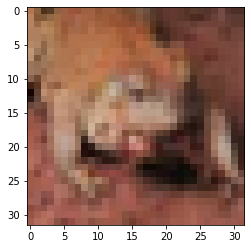

Predicted label: automobile, Actual label: automobile


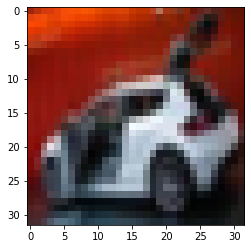

Predicted label: frog, Actual label: frog


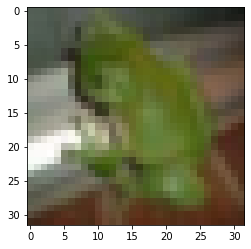

Predicted label: cat, Actual label: cat


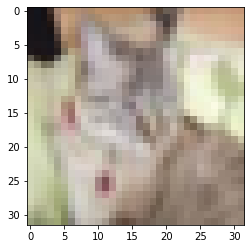

Predicted label: truck, Actual label: automobile


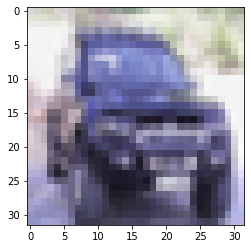

In [12]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Make predictions
predictions = model.predict(x_test)

# Get the predicted class labels
predicted_labels = tf.argmax(predictions, axis=1)

# Display the predicted class labels and corresponding images
for i in range(10):
    predicted_label = predicted_labels[i]
    actual_label = y_test[i][0]
    predicted_class = label_names[predicted_label]
    actual_class = label_names[actual_label]
    print(f"Predicted label: {predicted_class}, Actual label: {actual_class}")
    # Display the image
    plt.imshow(x_test[i])
    plt.show()

## Make a prediction

In [13]:
# Load and preprocess a single image
image_path = 'plane.png'  # Replace with the path to your image file

# Convert the image to RGB format
image = Image.open(image_path).convert('RGB')

# Resize 
image = image.resize((32, 32))
image = np.array(image) / 255.0

# Expand dimensions to match the model input shape
image = np.expand_dims(image, axis=0)



1/1 [==============================] - 0s 33ms/step


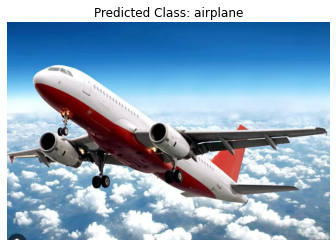

In [14]:
# Make prediction
prediction = model.predict(image)
predicted_label = np.argmax(prediction)
predicted_class = label_names[predicted_label]

# display the predicted class label and the image
plt.imshow(plt.imread(image_path))
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0